In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)
n_samples,n_features = X.shape

In [4]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

epoch 1: loss = 5339.5249
epoch 11: loss = 3963.5415
epoch 21: loss = 2968.0649
epoch 31: loss = 2247.0967
epoch 41: loss = 1724.4196
epoch 51: loss = 1345.1466
epoch 61: loss = 1069.6992
epoch 71: loss = 869.4982
epoch 81: loss = 723.8824
epoch 91: loss = 617.8991


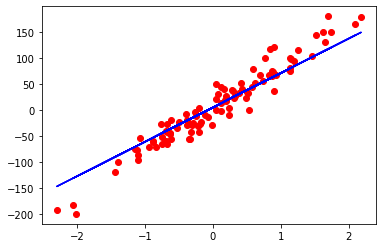

In [8]:
num_epochs = 100
for epoch in range(num_epochs):
    y_predicted = model(X)
    loss = criterion(y_predicted,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch%10==0:
        print(f'epoch {epoch+1}: loss = {loss.item():.4f}')
predicted = model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()